In [1]:
# Install the statsmodels package.
!pip install statsmodels

# Import the necessary libraries.
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# The statsmodels
import statsmodels.api as sm 
from statsmodels.formula.api import ols

# Import and read the data file (car4u.csv).
loyalty_club = pd.read_csv('loyalty_club.csv')

# View the DataFrame.
print(loyalty_club.head())
print(loyalty_club.info())
loyalty_club.describe()


                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


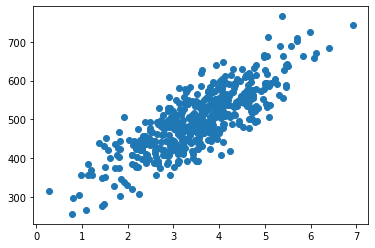

In [2]:
# Define the dependent variable.
y = loyalty_club['Yearly Amount Spent'] 

# Define the independent variable.
x = loyalty_club['Length of Membership'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [3]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = loyalty_club).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     943.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          4.81e-117
Time:                        16:32:56   Log-Likelihood:                -2629.9
No. Observations:                 500   AIC:                             5264.
Df Residuals:                     498   BIC:                             5272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    272.3998      7.675     35.492      0.000     257.320     287.479
x             64.2187      2.090     30.723      0.000      60.112      68.326
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept    272.399786
x             64.218684
dtype: float64
Standard errors:  Intercept    7.675029
x            2.090279
dtype: float64
Predicted values:  [534.58031167 443.48055621 535.98815023 472.77356232 557.93585632
 625.18559081 573.26542963 557.16299194 482.61538362 478.07977809
 431.82959075 510.85719566 532.25575785 524.0433874  432.59609701
 488.03629241 473.79810295 427.86077269 369.79227452 533.4197463
 567.8017111  372.52647229 416.58022306 524.09222375 638.77726787
 447.18609052 570.9010306  464.82237366 524.36107122 576.96187463
 469.06103924 495.32939069 551.30557238 453.50272007 537.27522716
 506.7521418  391.03548409 494.10763858 571.04821678 543.55908506
 572.38295023 570.76749813 543.04911554 570.58374106 417.44965411
 507.63960122 521.36760918 536.54575595 478.06212615 477.7967792
 656.21997157 462.01630176 406.93097521 519.99310506 457.00261758
 490.2328056  464.78362773 485.29915796 495.36186506 527.38364449
 570.33083389 598.70841293 580.8184064

In [5]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y_pred = (272.3998) + 64.2187 * loyalty_club['Length of Membership']

# View the output.
y_pred

0      534.580390
1      443.480612
2      535.988229
3      472.773625
4      557.935940
          ...    
495    512.999846
496    502.079645
497    590.813099
498    422.445808
499    448.048192
Name: Length of Membership, Length: 500, dtype: float64

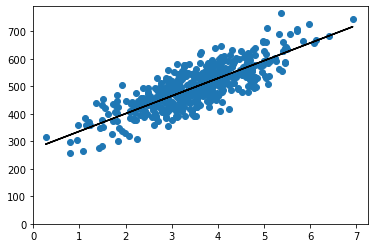

In [6]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()